TOURISM ANALYTICS - CLASSIFICATION MODELING (VISIT MODE PREDICTION)

1. DATA LOADING AND TARGET ANALYSIS
--------------------------------------------------
Looking for processed data at: ../data/processed/
✓ Master dataset loaded: (14185, 54)
✓ Pre-split data loaded: Train (11348, 48), Test (2837, 48)

Target Variable Analysis: VisitMode
------------------------------
Visit Mode Distribution:
  Mode 1: 158 visits (1.1%)
  Mode 2: 6,168 visits (43.5%)
  Mode 3: 3,997 visits (28.2%)
  Mode 4: 2,655 visits (18.7%)
  Mode 5: 1,207 visits (8.5%)

Visit Mode Labels:
  1: Business
  2: Couples
  3: Family
  4: Friends
  5: Solo

Class Balance Analysis:
  Number of classes: 5
  Smallest class: 158 samples
  Largest class: 6,168 samples
  Imbalance ratio: 39.04
  Balance status: Highly imbalanced

2. FEATURE SELECTION AND PREPARATION
--------------------------------------------------
Target variable: VisitMode
Available features: 34
Sample features: ['VisitYear', 'VisitMonth', 'ContinentId', 'R

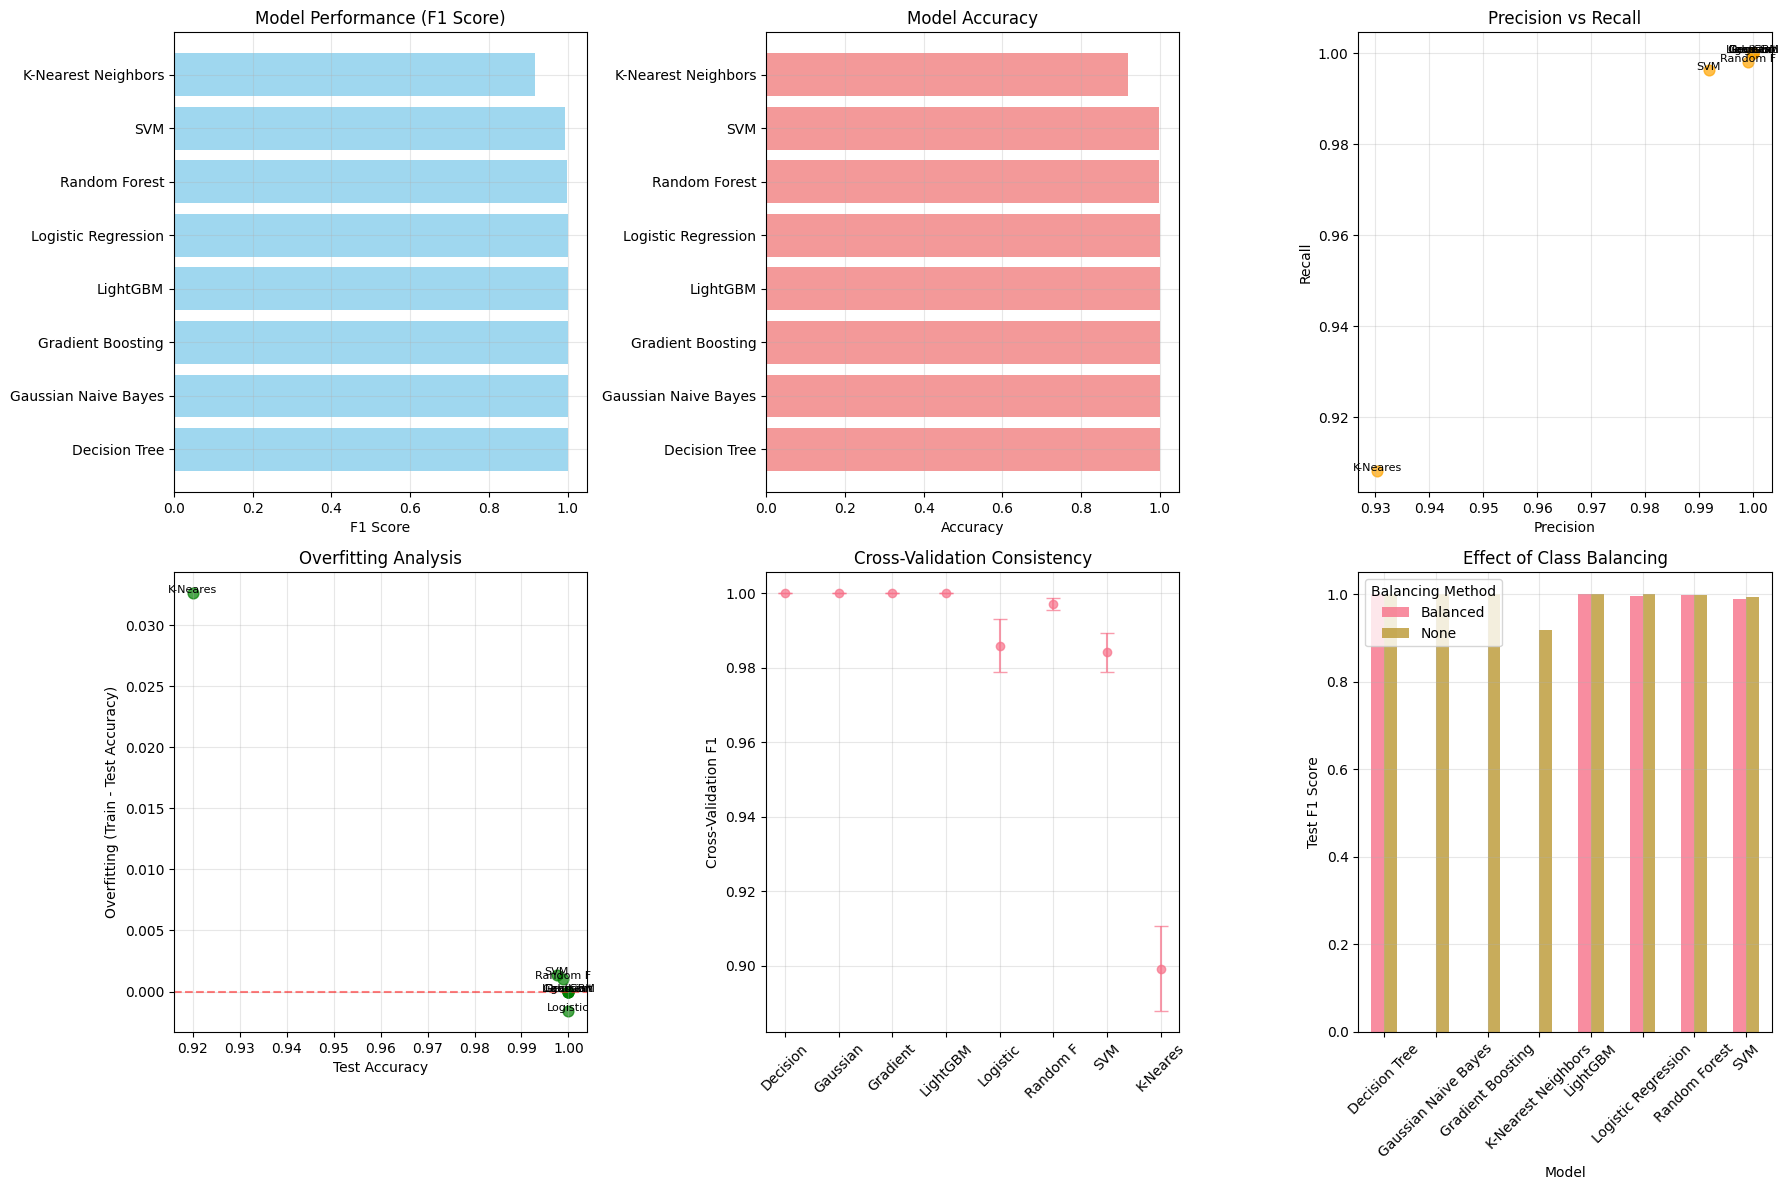

✓ Performance visualizations saved as 'classification_model_comparison.png'

6. HYPERPARAMETER TUNING FOR TOP MODELS
--------------------------------------------------

Tuning Decision Tree with Raw scaling and None balancing...
  No parameter grid defined for Decision Tree

Tuning Gaussian Naive Bayes with Standard scaling and None balancing...
  No parameter grid defined for Gaussian Naive Bayes

Tuning Gradient Boosting with Raw scaling and None balancing...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
  Best CV F1: 1.0000
  Test F1: 1.0000
  Best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

7. CONFUSION MATRIX AND DETAILED CLASSIFICATION ANALYSIS
--------------------------------------------------
Best performing model: Gradient Boosting
Test Accuracy: 1.0000
Test F1: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000


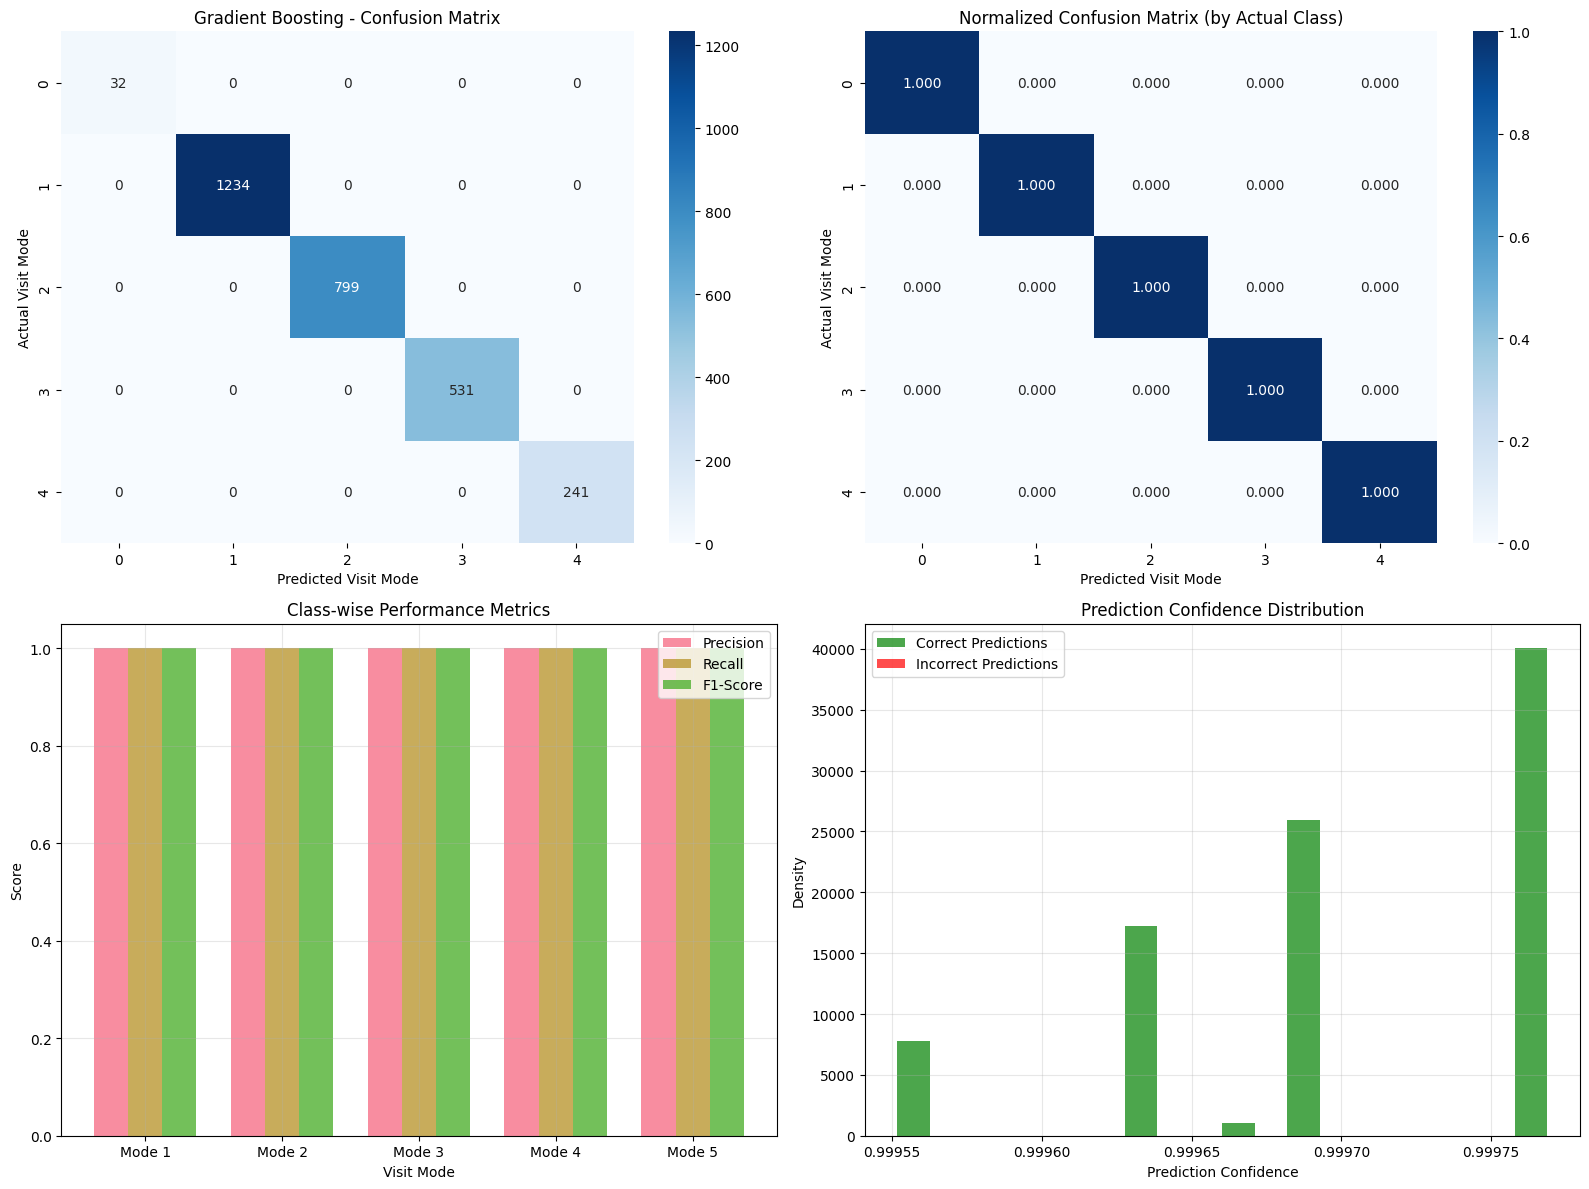

✓ Detailed classification analysis saved as 'classification_detailed_analysis.png'

📊 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00      1234
           3       1.00      1.00      1.00       799
           4       1.00      1.00      1.00       531
           5       1.00      1.00      1.00       241

    accuracy                           1.00      2837
   macro avg       1.00      1.00      1.00      2837
weighted avg       1.00      1.00      1.00      2837


8. FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------


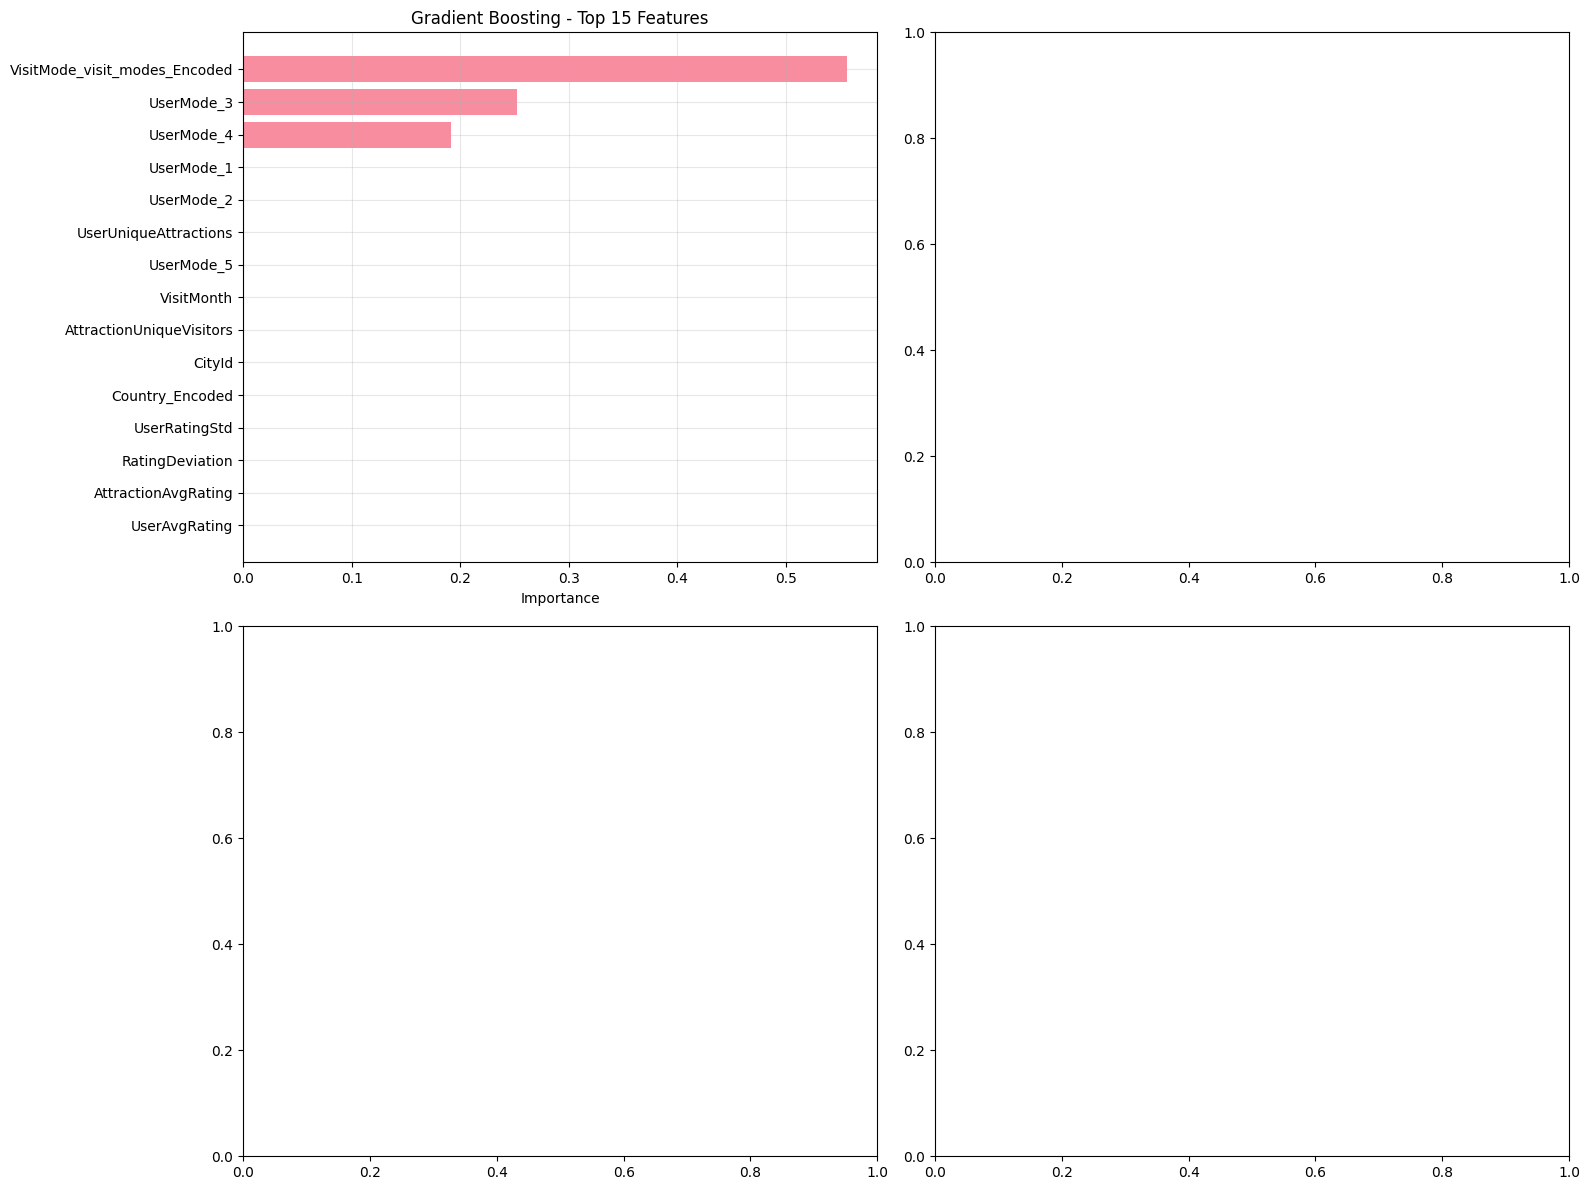

✓ Feature importance analysis saved as 'classification_feature_importance.png'

TOP 10 MOST IMPORTANT FEATURES (averaged across models):

9. MODEL SAVING AND BUSINESS INSIGHTS
--------------------------------------------------
✓ Best model saved: ../models/classification/best_visitmode_classifier.pkl
✓ Model metadata saved: ../models/classification/visitmode_classifier_metadata.json

📊 BUSINESS INSIGHTS FROM VISIT MODE PREDICTION MODEL:
1. Model can predict visit modes with 100.0% accuracy
2. Macro F1-score: 1.000 (balanced across all visit modes)
3. Best performing algorithm: Gradient Boosting
4. Model uses 34 engineered features for prediction
5. Best predicted visit mode: Mode 1
6. Most challenging visit mode: Mode 1
7. Most important predictor: VisitMode_visit_modes_Encoded
8. Dataset is imbalanced (ratio: 39.0) - class balancing was beneficial

💡 BUSINESS APPLICATIONS:
1. Predict visitor travel style before arrival for personalized service preparation
2. Optimize marketing campaig

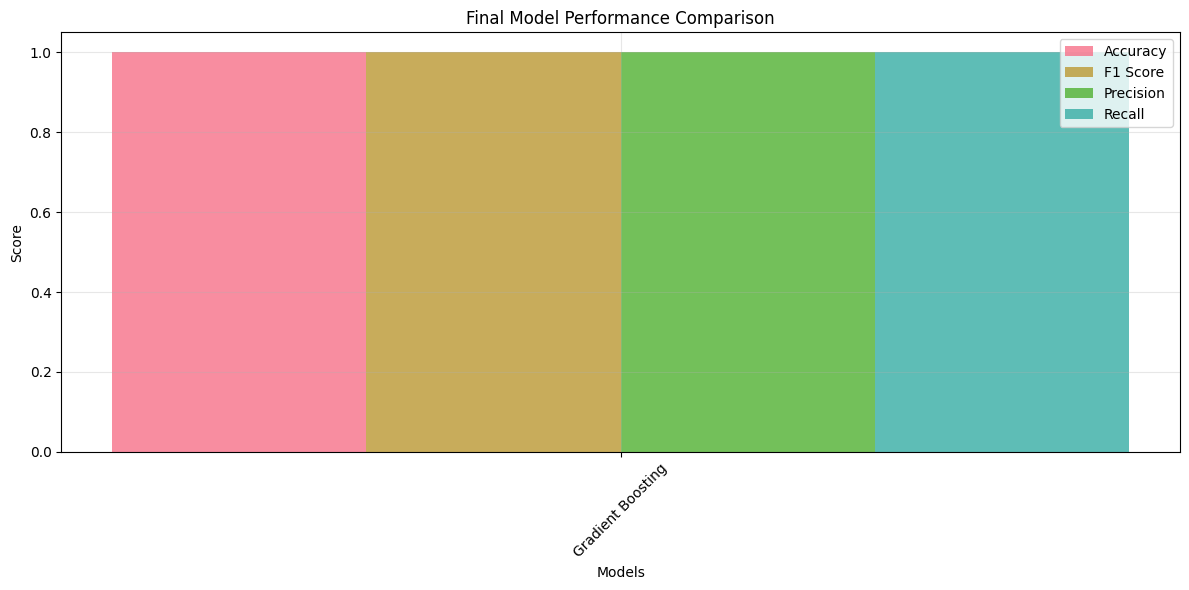

✓ Final comparison saved as 'final_classification_comparison.png'

✅ CLASSIFICATION MODELING COMPLETED SUCCESSFULLY
🎯 Next Step: Recommendation System Development

MODEL SUMMARY:
  Best Model: Gradient Boosting
  Test Accuracy: 1.0000
  Test F1-Score: 1.0000
  Classes: 5
  Features: 34
  Saved to: ../models/classification/

  Performance by Visit Mode:
    Mode 1: F1=1.000, Support=32
    Mode 2: F1=1.000, Support=1234
    Mode 3: F1=1.000, Support=799
    Mode 4: F1=1.000, Support=531
    Mode 5: F1=1.000, Support=241


In [2]:
# Tourism Experience Analytics - Classification Modeling
# Step 4: Visit Mode Prediction Models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from datetime import datetime
import joblib
warnings.filterwarnings('ignore')

# Machine Learning imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import xgboost as xgb
import lightgbm as lgb

pd.set_option('display.max_columns', None)
plt.style.use('default')
sns.set_palette("husl")

print("=" * 80)
print("TOURISM ANALYTICS - CLASSIFICATION MODELING (VISIT MODE PREDICTION)")
print("=" * 80)

# =============================================================================
# SECTION 1: DATA LOADING AND TARGET ANALYSIS
# =============================================================================

print("\n1. DATA LOADING AND TARGET ANALYSIS")
print("-" * 50)

# Auto-detect processed data path
current_dir = os.getcwd()
if 'notebooks' in current_dir:
    processed_path = '../data/processed/'
else:
    processed_path = 'data/processed/'

print(f"Looking for processed data at: {processed_path}")

# Load processed datasets
try:
    master_df = pd.read_csv(processed_path + 'master_dataset.csv')
    print(f"✓ Master dataset loaded: {master_df.shape}")
    
    # Try to load pre-split data
    try:
        train_class = pd.read_csv(processed_path + 'train_classification.csv')
        test_class = pd.read_csv(processed_path + 'test_classification.csv')
        print(f"✓ Pre-split data loaded: Train {train_class.shape}, Test {test_class.shape}")
        use_presplit = True
    except FileNotFoundError:
        print("Pre-split data not found, will create new splits")
        use_presplit = False
        
except FileNotFoundError:
    print("❌ Processed data not found. Please run Step 2 (Data Preprocessing) first.")
    exit()

# Define target variable
target = 'VisitMode'
if target not in master_df.columns:
    print(f"❌ Target variable '{target}' not found in dataset")
    exit()

# Analyze target variable
print(f"\nTarget Variable Analysis: {target}")
print("-" * 30)

target_dist = master_df[target].value_counts().sort_index()
print("Visit Mode Distribution:")
for mode_id, count in target_dist.items():
    pct = (count / len(master_df)) * 100
    print(f"  Mode {mode_id}: {count:,} visits ({pct:.1f}%)")

# Check if we have visit mode labels
if 'VisitMode_visit_modes' in master_df.columns:
    mode_labels = master_df[['VisitMode', 'VisitMode_visit_modes']].drop_duplicates().sort_values('VisitMode')
    print(f"\nVisit Mode Labels:")
    for _, row in mode_labels.iterrows():
        print(f"  {int(row['VisitMode'])}: {row['VisitMode_visit_modes']}")
else:
    print("Visit mode labels not found, using numeric IDs")

# Check class balance
n_classes = master_df[target].nunique()
min_class_size = target_dist.min()
max_class_size = target_dist.max()
imbalance_ratio = max_class_size / min_class_size

print(f"\nClass Balance Analysis:")
print(f"  Number of classes: {n_classes}")
print(f"  Smallest class: {min_class_size:,} samples")
print(f"  Largest class: {max_class_size:,} samples")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}")
print(f"  Balance status: {'Balanced' if imbalance_ratio < 2 else 'Moderate imbalance' if imbalance_ratio < 5 else 'Highly imbalanced'}")

# =============================================================================
# SECTION 2: FEATURE SELECTION AND PREPARATION
# =============================================================================

print("\n2. FEATURE SELECTION AND PREPARATION")
print("-" * 50)

# Exclude non-predictive columns
exclude_columns = [
    'TransactionId', 'UserId', 'AttractionId', 'VisitMode', 'VisitModeId',  # IDs and target
    'Attraction', 'AttractionAddress', 'CityName',                         # Text columns
    'Rating'  # Don't use rating to predict visit mode (could be reverse causation)
]

# Select numeric features only
feature_columns = [col for col in master_df.columns 
                  if col not in exclude_columns and master_df[col].dtype in ['int8', 'int16', 'int32', 'int64', 'float32', 'float64', 'uint8', 'uint16', 'uint32']]

print(f"Target variable: {target}")
print(f"Available features: {len(feature_columns)}")
print(f"Sample features: {feature_columns[:10]}")

# Check for missing values
missing_target = master_df[target].isnull().sum()
missing_features = master_df[feature_columns].isnull().sum().sum()

print(f"\nData quality check:")
print(f"  Missing values in target: {missing_target}")
print(f"  Missing values in features: {missing_features}")

if missing_target > 0 or missing_features > 0:
    print("Cleaning missing values...")
    # Remove rows with missing target
    master_df = master_df[master_df[target].notna()]
    # Fill missing features with median
    master_df[feature_columns] = master_df[feature_columns].fillna(master_df[feature_columns].median())
    print(f"Cleaned dataset shape: {master_df.shape}")

# =============================================================================
# SECTION 3: TRAIN-TEST SPLIT AND CLASS BALANCING
# =============================================================================

print("\n3. TRAIN-TEST SPLIT AND CLASS BALANCING")
print("-" * 50)

if use_presplit:
    # Use pre-split data
    X_train = train_class[feature_columns]
    y_train = train_class[target]
    X_test = test_class[feature_columns]
    y_test = test_class[target]
else:
    # Create new split
    X = master_df[feature_columns]
    y = master_df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

print(f"\nTraining set class distribution:")
train_dist = y_train.value_counts().sort_index()
for mode_id, count in train_dist.items():
    pct = (count / len(y_train)) * 100
    print(f"  Mode {mode_id}: {count:,} ({pct:.1f}%)")

# Calculate class weights for imbalanced datasets
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print(f"\nClass weights for balancing:")
for mode_id, weight in class_weight_dict.items():
    print(f"  Mode {mode_id}: {weight:.3f}")

# Feature scaling
scalers = {
    'Standard': StandardScaler(),
    'Robust': RobustScaler()
}

scaled_features = {}
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scaled_features[scaler_name] = {
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'scaler': scaler
    }

print(f"✓ Applied {len(scalers)} different scaling methods")

# =============================================================================
# SECTION 4: BASELINE MODELS COMPARISON
# =============================================================================

print("\n4. BASELINE MODELS COMPARISON")
print("-" * 50)

# Define baseline models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42, probability=True)
}

# Add advanced models if available
try:
    models['XGBoost'] = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
    models['LightGBM'] = lgb.LGBMClassifier(random_state=42, verbose=-1)
except:
    print("XGBoost/LightGBM not available, using scikit-learn models only")

print(f"Testing {len(models)} baseline models...")

# Test models with different configurations
results = []
model_performances = {}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Test with different scalers and raw data
    test_data = {'Raw': {'X_train': X_train, 'X_test': X_test}}
    test_data.update(scaled_features)
    
    best_score = -np.inf
    best_config = None
    
    for scaler_name, data in test_data.items():
        try:
            # Test with and without class balancing
            for use_balancing in [False, True]:
                if use_balancing and hasattr(model, 'class_weight'):
                    model.set_params(class_weight='balanced')
                    balance_method = 'Balanced'
                elif use_balancing and hasattr(model, 'scale_pos_weight'):
                    # For XGBoost
                    if len(np.unique(y_train)) == 2:  # Binary classification
                        scale_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
                        model.set_params(scale_pos_weight=scale_weight)
                    balance_method = 'Balanced'
                else:
                    balance_method = 'None'
                
                # Cross-validation
                cv_scores = cross_val_score(model, data['X_train'], y_train, 
                                          cv=cv, scoring='f1_macro', n_jobs=-1)
                mean_cv_score = cv_scores.mean()
                
                # Train on full training set
                model.fit(data['X_train'], y_train)
                
                # Predictions
                y_train_pred = model.predict(data['X_train'])
                y_test_pred = model.predict(data['X_test'])
                
                # Calculate probabilities for multi-class
                if hasattr(model, 'predict_proba'):
                    y_test_proba = model.predict_proba(data['X_test'])
                else:
                    y_test_proba = None
                
                # Metrics
                train_accuracy = accuracy_score(y_train, y_train_pred)
                test_accuracy = accuracy_score(y_test, y_test_pred)
                test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
                test_recall = recall_score(y_test, y_test_pred, average='macro', zero_division=0)
                test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)
                
                # Store results
                result = {
                    'Model': model_name,
                    'Scaler': scaler_name,
                    'Balancing': balance_method,
                    'CV_F1_Mean': mean_cv_score,
                    'CV_F1_Std': cv_scores.std(),
                    'Train_Accuracy': train_accuracy,
                    'Test_Accuracy': test_accuracy,
                    'Test_Precision': test_precision,
                    'Test_Recall': test_recall,
                    'Test_F1': test_f1,
                    'Overfitting': train_accuracy - test_accuracy
                }
                
                results.append(result)
                
                # Track best configuration for this model
                if test_f1 > best_score:
                    best_score = test_f1
                    best_config = {
                        'scaler': scaler_name,
                        'balancing': balance_method,
                        'model': model,
                        'predictions': y_test_pred,
                        'probabilities': y_test_proba,
                        'metrics': result
                    }
                
                # Reset model parameters
                if hasattr(model, 'class_weight'):
                    model.set_params(class_weight=None)
                if hasattr(model, 'scale_pos_weight'):
                    model.set_params(scale_pos_weight=1)
                    
        except Exception as e:
            print(f"  Error with {scaler_name} scaling: {str(e)}")
            continue
    
    model_performances[model_name] = best_config
    if best_config is not None:
        print(f"  Best F1: {best_score:.4f} (with {best_config['scaler']} scaling, {best_config['balancing']} balancing)")
    else:
        print(f"  No valid configuration found for {model_name}")

# Create results DataFrame
results_df = pd.DataFrame(results)
print(f"\n✓ Completed baseline model comparison")

# =============================================================================
# SECTION 5: MODEL PERFORMANCE ANALYSIS
# =============================================================================

print("\n5. MODEL PERFORMANCE ANALYSIS")
print("-" * 50)

# Sort by test F1 score
best_results = results_df.loc[results_df.groupby('Model')['Test_F1'].idxmax()].sort_values('Test_F1', ascending=False)

print("🏆 MODEL RANKINGS (by Test F1 Score):")
print("=" * 80)
for idx, (_, row) in enumerate(best_results.head(10).iterrows(), 1):
    print(f"{idx:2d}. {row['Model']:<20} | F1: {row['Test_F1']:.4f} | Acc: {row['Test_Accuracy']:.4f} | Scaler: {row['Scaler']:<8} | Balance: {row['Balancing']}")

# Performance visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. F1 Score Comparison
top_models = best_results.head(8)
axes[0,0].barh(range(len(top_models)), top_models['Test_F1'], color='skyblue', alpha=0.8)
axes[0,0].set_yticks(range(len(top_models)))
axes[0,0].set_yticklabels(top_models['Model'])
axes[0,0].set_xlabel('F1 Score')
axes[0,0].set_title('Model Performance (F1 Score)')
axes[0,0].grid(True, alpha=0.3)

# 2. Accuracy Comparison
axes[0,1].barh(range(len(top_models)), top_models['Test_Accuracy'], color='lightcoral', alpha=0.8)
axes[0,1].set_yticks(range(len(top_models)))
axes[0,1].set_yticklabels(top_models['Model'])
axes[0,1].set_xlabel('Accuracy')
axes[0,1].set_title('Model Accuracy')
axes[0,1].grid(True, alpha=0.3)

# 3. Precision vs Recall
axes[0,2].scatter(best_results['Test_Precision'], best_results['Test_Recall'], 
                 alpha=0.7, s=60, c='orange')
for i, model in enumerate(best_results['Model']):
    axes[0,2].annotate(model[:8], 
                      (best_results.iloc[i]['Test_Precision'], best_results.iloc[i]['Test_Recall']),
                      fontsize=8, ha='center')
axes[0,2].set_xlabel('Precision')
axes[0,2].set_ylabel('Recall')
axes[0,2].set_title('Precision vs Recall')
axes[0,2].grid(True, alpha=0.3)

# 4. Overfitting Analysis
axes[1,0].scatter(best_results['Test_Accuracy'], best_results['Overfitting'], 
                 alpha=0.7, s=60, c='green')
for i, model in enumerate(best_results['Model']):
    axes[1,0].annotate(model[:8], 
                      (best_results.iloc[i]['Test_Accuracy'], best_results.iloc[i]['Overfitting']),
                      fontsize=8, ha='center')
axes[1,0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1,0].set_xlabel('Test Accuracy')
axes[1,0].set_ylabel('Overfitting (Train - Test Accuracy)')
axes[1,0].set_title('Overfitting Analysis')
axes[1,0].grid(True, alpha=0.3)

# 5. Cross-validation consistency
axes[1,1].errorbar(range(len(best_results)), best_results['CV_F1_Mean'], 
                  yerr=best_results['CV_F1_Std'], fmt='o', capsize=5, alpha=0.7)
axes[1,1].set_xticks(range(len(best_results)))
axes[1,1].set_xticklabels([model[:8] for model in best_results['Model']], rotation=45)
axes[1,1].set_ylabel('Cross-Validation F1')
axes[1,1].set_title('Cross-Validation Consistency')
axes[1,1].grid(True, alpha=0.3)

# 6. Class balance effect
balance_effect = results_df.groupby(['Model', 'Balancing'])['Test_F1'].max().unstack()
balance_effect.plot(kind='bar', ax=axes[1,2], alpha=0.8)
axes[1,2].set_title('Effect of Class Balancing')
axes[1,2].set_ylabel('Test F1 Score')
axes[1,2].legend(title='Balancing Method')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('classification_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Performance visualizations saved as 'classification_model_comparison.png'")

# =============================================================================
# SECTION 6: HYPERPARAMETER TUNING FOR TOP MODELS
# =============================================================================

print("\n6. HYPERPARAMETER TUNING FOR TOP MODELS")
print("-" * 50)

# Select top 3 models for tuning
top_3_models = best_results.head(3)
tuned_models = {}

for _, row in top_3_models.iterrows():
    model_name = row['Model']
    best_scaler = row['Scaler']
    best_balancing = row['Balancing']
    
    print(f"\nTuning {model_name} with {best_scaler} scaling and {best_balancing} balancing...")
    
    # Get the appropriate data
    if best_scaler == 'Raw':
        X_train_tune = X_train
        X_test_tune = X_test
    else:
        X_train_tune = scaled_features[best_scaler]['X_train']
        X_test_tune = scaled_features[best_scaler]['X_test']
    
    # Define parameter grids
    param_grids = {
        'Random Forest': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced'] if best_balancing == 'Balanced' else [None]
        },
        'Gradient Boosting': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 0.9, 1.0]
        },
        'Logistic Regression': {
            'C': [0.1, 1.0, 10.0, 100.0],
            'solver': ['liblinear', 'lbfgs'],
            'class_weight': ['balanced'] if best_balancing == 'Balanced' else [None]
        },
        'XGBoost': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0]
        },
        'LightGBM': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0]
        }
    }
    
    if model_name in param_grids:
        try:
            # Create model instance
            if model_name == 'Random Forest':
                base_model = RandomForestClassifier(random_state=42)
            elif model_name == 'Gradient Boosting':
                base_model = GradientBoostingClassifier(random_state=42)
            elif model_name == 'Logistic Regression':
                base_model = LogisticRegression(random_state=42, max_iter=1000)
            elif model_name == 'XGBoost':
                base_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
            elif model_name == 'LightGBM':
                base_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
            else:
                continue
            
            # Grid search
            grid_search = GridSearchCV(
                base_model, 
                param_grids[model_name],
                cv=cv, 
                scoring='f1_macro',
                n_jobs=-1,
                verbose=1
            )
            
            grid_search.fit(X_train_tune, y_train)
            
            # Best model predictions
            y_test_pred_tuned = grid_search.predict(X_test_tune)
            
            if hasattr(grid_search.best_estimator_, 'predict_proba'):
                y_test_proba_tuned = grid_search.best_estimator_.predict_proba(X_test_tune)
            else:
                y_test_proba_tuned = None
            
            # Metrics
            tuned_accuracy = accuracy_score(y_test, y_test_pred_tuned)
            tuned_precision = precision_score(y_test, y_test_pred_tuned, average='macro', zero_division=0)
            tuned_recall = recall_score(y_test, y_test_pred_tuned, average='macro', zero_division=0)
            tuned_f1 = f1_score(y_test, y_test_pred_tuned, average='macro', zero_division=0)
            
            # Store results
            tuned_models[model_name] = {
                'model': grid_search.best_estimator_,
                'best_params': grid_search.best_params_,
                'best_score': grid_search.best_score_,
                'test_accuracy': tuned_accuracy,
                'test_precision': tuned_precision,
                'test_recall': tuned_recall,
                'test_f1': tuned_f1,
                'predictions': y_test_pred_tuned,
                'probabilities': y_test_proba_tuned,
                'scaler': best_scaler,
                'balancing': best_balancing
            }
            
            print(f"  Best CV F1: {grid_search.best_score_:.4f}")
            print(f"  Test F1: {tuned_f1:.4f}")
            print(f"  Best params: {grid_search.best_params_}")
            
        except Exception as e:
            print(f"  Error tuning {model_name}: {str(e)}")
    else:
        print(f"  No parameter grid defined for {model_name}")

# =============================================================================
# SECTION 7: CONFUSION MATRIX AND CLASSIFICATION REPORT
# =============================================================================

print("\n7. CONFUSION MATRIX AND DETAILED CLASSIFICATION ANALYSIS")
print("-" * 50)

if tuned_models:
    # Select best overall model
    best_model_name = max(tuned_models.keys(), key=lambda k: tuned_models[k]['test_f1'])
    best_model_info = tuned_models[best_model_name]
    
    print(f"Best performing model: {best_model_name}")
    print(f"Test Accuracy: {best_model_info['test_accuracy']:.4f}")
    print(f"Test F1: {best_model_info['test_f1']:.4f}")
    print(f"Test Precision: {best_model_info['test_precision']:.4f}")
    print(f"Test Recall: {best_model_info['test_recall']:.4f}")
    
    y_pred_best = best_model_info['predictions']
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_best)
    
    # Create detailed analysis visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
    axes[0,0].set_title(f'{best_model_name} - Confusion Matrix')
    axes[0,0].set_xlabel('Predicted Visit Mode')
    axes[0,0].set_ylabel('Actual Visit Mode')
    
    # 2. Normalized Confusion Matrix
    cm_normalized = confusion_matrix(y_test, y_pred_best, normalize='true')
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues', ax=axes[0,1])
    axes[0,1].set_title('Normalized Confusion Matrix (by Actual Class)')
    axes[0,1].set_xlabel('Predicted Visit Mode')
    axes[0,1].set_ylabel('Actual Visit Mode')
    
    # 3. Class-wise Performance
    class_report = classification_report(y_test, y_pred_best, output_dict=True)
    class_performance = []
    for class_id in sorted([k for k in class_report.keys() if k.isdigit() or isinstance(k, int)]):
        class_performance.append({
            'Class': f'Mode {class_id}',
            'Precision': class_report[str(class_id)]['precision'],
            'Recall': class_report[str(class_id)]['recall'],
            'F1': class_report[str(class_id)]['f1-score'],
            'Support': class_report[str(class_id)]['support']
        })
    
    class_df = pd.DataFrame(class_performance)
    x_pos = np.arange(len(class_df))
    width = 0.25
    
    axes[1,0].bar(x_pos - width, class_df['Precision'], width, label='Precision', alpha=0.8)
    axes[1,0].bar(x_pos, class_df['Recall'], width, label='Recall', alpha=0.8)
    axes[1,0].bar(x_pos + width, class_df['F1'], width, label='F1-Score', alpha=0.8)
    axes[1,0].set_xlabel('Visit Mode')
    axes[1,0].set_ylabel('Score')
    axes[1,0].set_title('Class-wise Performance Metrics')
    axes[1,0].set_xticks(x_pos)
    axes[1,0].set_xticklabels(class_df['Class'])
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Prediction Confidence (if available)
    if best_model_info['probabilities'] is not None:
        y_proba = best_model_info['probabilities']
        confidence_scores = np.max(y_proba, axis=1)
        correct_predictions = (y_test == y_pred_best)
        
        axes[1,1].hist(confidence_scores[correct_predictions], bins=20, alpha=0.7, 
                      label='Correct Predictions', color='green', density=True)
        axes[1,1].hist(confidence_scores[~correct_predictions], bins=20, alpha=0.7, 
                      label='Incorrect Predictions', color='red', density=True)
        axes[1,1].set_xlabel('Prediction Confidence')
        axes[1,1].set_ylabel('Density')
        axes[1,1].set_title('Prediction Confidence Distribution')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
    else:
        axes[1,1].text(0.5, 0.5, 'Prediction probabilities\nnot available', 
                      ha='center', va='center', transform=axes[1,1].transAxes, fontsize=12)
        axes[1,1].set_title('Prediction Confidence Distribution')
    
    plt.tight_layout()
    plt.savefig('classification_detailed_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Detailed classification analysis saved as 'classification_detailed_analysis.png'")
    
    # Print detailed classification report
    print(f"\n📊 DETAILED CLASSIFICATION REPORT:")
    print("=" * 60)
    print(classification_report(y_test, y_pred_best))

# =============================================================================
# SECTION 8: FEATURE IMPORTANCE ANALYSIS
# =============================================================================

print("\n8. FEATURE IMPORTANCE ANALYSIS")
print("-" * 50)

# Analyze feature importance for tree-based models
importance_models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']
feature_importance_data = {}

for model_name in importance_models:
    if model_name in tuned_models:
        model = tuned_models[model_name]['model']
        
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_importance_data[model_name] = pd.Series(
                importances, index=feature_columns
            ).sort_values(ascending=False)

if feature_importance_data:
    # Create feature importance visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    for idx, (model_name, importances) in enumerate(feature_importance_data.items()):
        if idx < 4:  # Limit to 4 subplots
            top_features = importances.head(15)
            axes[idx].barh(range(len(top_features)), top_features.values[::-1], alpha=0.8)
            axes[idx].set_yticks(range(len(top_features)))
            axes[idx].set_yticklabels(top_features.index[::-1], fontsize=10)
            axes[idx].set_xlabel('Importance')
            axes[idx].set_title(f'{model_name} - Top 15 Features')
            axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('classification_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Feature importance analysis saved as 'classification_feature_importance.png'")
    
    # Print top features across models
    print("\nTOP 10 MOST IMPORTANT FEATURES (averaged across models):")
    if len(feature_importance_data) > 1:
        avg_importance = pd.concat(feature_importance_data.values(), axis=1).mean(axis=1).sort_values(ascending=False)
        for i, (feature, importance) in enumerate(avg_importance.head(10).items(), 1):
            print(f"{i:2d}. {feature:<30} | Importance: {importance:.4f}")

# =============================================================================
# SECTION 9: MODEL SAVING AND BUSINESS INSIGHTS
# =============================================================================

print("\n9. MODEL SAVING AND BUSINESS INSIGHTS")
print("-" * 50)

# Create models directory
if 'notebooks' in current_dir:
    models_dir = '../models/classification/'
else:
    models_dir = 'models/classification/'

os.makedirs(models_dir, exist_ok=True)

# Save best model and results
if tuned_models:
    best_model_info = tuned_models[best_model_name]
    
    # Save model
    joblib.dump(best_model_info['model'], models_dir + 'best_visitmode_classifier.pkl')
    
    # Save scaler if used
    if best_model_info['scaler'] != 'Raw':
        scaler = scaled_features[best_model_info['scaler']]['scaler']
        joblib.dump(scaler, models_dir + 'visitmode_classifier_scaler.pkl')
    
    # Save label encoder if needed (for converting predictions back to labels)
    if 'VisitMode_visit_modes' in master_df.columns:
        mode_mapping = master_df[['VisitMode', 'VisitMode_visit_modes']].drop_duplicates().set_index('VisitMode')['VisitMode_visit_modes'].to_dict()
        joblib.dump(mode_mapping, models_dir + 'visitmode_label_mapping.pkl')
    
    # Save model metadata
    metadata = {
        'model_name': best_model_name,
        'model_type': 'classification',
        'target_variable': 'VisitMode',
        'n_classes': int(master_df[target].nunique()),
        'class_distribution': master_df[target].value_counts().to_dict(),
        'features': feature_columns,
        'scaler_used': best_model_info['scaler'],
        'balancing_used': best_model_info['balancing'],
        'performance': {
            'test_accuracy': float(best_model_info['test_accuracy']),
            'test_f1_macro': float(best_model_info['test_f1']),
            'test_precision_macro': float(best_model_info['test_precision']),
            'test_recall_macro': float(best_model_info['test_recall'])
        },
        'best_parameters': best_model_info['best_params'],
        'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'feature_count': len(feature_columns)
    }
    
    import json
    with open(models_dir + 'visitmode_classifier_metadata.json', 'w') as f:
        json.dump(metadata, f, indent=2)
    
    print(f"✓ Best model saved: {models_dir}best_visitmode_classifier.pkl")
    print(f"✓ Model metadata saved: {models_dir}visitmode_classifier_metadata.json")

# Business insights
print(f"\n📊 BUSINESS INSIGHTS FROM VISIT MODE PREDICTION MODEL:")
print("=" * 70)

if tuned_models:
    insights = [
        f"Model can predict visit modes with {best_model_info['test_accuracy']:.1%} accuracy",
        f"Macro F1-score: {best_model_info['test_f1']:.3f} (balanced across all visit modes)",
        f"Best performing algorithm: {best_model_name}",
        f"Model uses {len(feature_columns)} engineered features for prediction"
    ]
    
    # Add class-specific insights
    if 'class_df' in locals():
        best_predicted_class = class_df.loc[class_df['F1'].idxmax(), 'Class']
        worst_predicted_class = class_df.loc[class_df['F1'].idxmin(), 'Class']
        insights.extend([
            f"Best predicted visit mode: {best_predicted_class}",
            f"Most challenging visit mode: {worst_predicted_class}"
        ])
    
    # Add feature-specific insights
    if feature_importance_data and best_model_name in feature_importance_data:
        top_feature = feature_importance_data[best_model_name].index[0]
        insights.append(f"Most important predictor: {top_feature}")
    
    # Class balance insights
    if imbalance_ratio > 3:
        insights.append(f"Dataset is imbalanced (ratio: {imbalance_ratio:.1f}) - class balancing was beneficial")
    
    for i, insight in enumerate(insights, 1):
        print(f"{i}. {insight}")

print(f"\n💡 BUSINESS APPLICATIONS:")
applications = [
    "Predict visitor travel style before arrival for personalized service preparation",
    "Optimize marketing campaigns by targeting likely visit modes for specific attractions",
    "Plan resource allocation (family facilities vs business amenities) based on predictions",
    "Customize attraction recommendations based on predicted travel companion type",
    "Develop targeted promotional packages for different visitor segments",
    "Improve staff training by understanding which visitor types need specific attention"
]

for i, app in enumerate(applications, 1):
    print(f"{i}. {app}")

# =============================================================================
# SECTION 10: CROSS-MODEL COMPARISON AND SUMMARY
# =============================================================================

print("\n10. CROSS-MODEL COMPARISON AND SUMMARY")
print("-" * 50)

if tuned_models:
    print("🏆 FINAL MODEL COMPARISON (After Hyperparameter Tuning):")
    print("=" * 70)
    
    tuned_summary = []
    for model_name, info in tuned_models.items():
        tuned_summary.append({
            'Model': model_name,
            'Accuracy': info['test_accuracy'],
            'F1_Score': info['test_f1'],
            'Precision': info['test_precision'],
            'Recall': info['test_recall']
        })
    
    tuned_df = pd.DataFrame(tuned_summary).sort_values('F1_Score', ascending=False)
    print(tuned_df.round(4).to_string(index=False))
    
    # Model comparison visualization
    fig, ax = plt.subplots(figsize=(12, 6))
    
    x = np.arange(len(tuned_df))
    width = 0.2
    
    ax.bar(x - 1.5*width, tuned_df['Accuracy'], width, label='Accuracy', alpha=0.8)
    ax.bar(x - 0.5*width, tuned_df['F1_Score'], width, label='F1 Score', alpha=0.8)
    ax.bar(x + 0.5*width, tuned_df['Precision'], width, label='Precision', alpha=0.8)
    ax.bar(x + 1.5*width, tuned_df['Recall'], width, label='Recall', alpha=0.8)
    
    ax.set_xlabel('Models')
    ax.set_ylabel('Score')
    ax.set_title('Final Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(tuned_df['Model'], rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('final_classification_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Final comparison saved as 'final_classification_comparison.png'")

print("\n" + "=" * 80)
print("✅ CLASSIFICATION MODELING COMPLETED SUCCESSFULLY")
print("🎯 Next Step: Recommendation System Development")
print("=" * 80)

# Summary statistics
if tuned_models:
    print(f"\nMODEL SUMMARY:")
    print(f"  Best Model: {best_model_name}")
    print(f"  Test Accuracy: {best_model_info['test_accuracy']:.4f}")
    print(f"  Test F1-Score: {best_model_info['test_f1']:.4f}")
    print(f"  Classes: {master_df[target].nunique()}")
    print(f"  Features: {len(feature_columns)}")
    print(f"  Saved to: {models_dir}")
    
    # Performance by class
    if 'class_df' in locals():
        print(f"\n  Performance by Visit Mode:")
        for _, row in class_df.iterrows():
            print(f"    {row['Class']}: F1={row['F1']:.3f}, Support={int(row['Support'])}")